# First Image

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import cv2
import numpy as np
from tensorflow.keras.applications import imagenet_utils

In [2]:
model=tf.keras.applications.MobileNetV2()

14536120/14536120 [==============================] - 0s 0us/step


In [5]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=f6ce2b1c5bb00c3d4a94dfe1f8b5aa84de0070318a9b452205caab1062c850f2
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [18]:
from lime import lime_image

In [19]:
image=cv2.imread("KP.jpg")
final_image=cv2.resize(image,(224,224))
final_image=np.expand_dims(final_image,axis=0)
final_image=final_image/255.0
predictaions=model.predict(final_image)
result=imagenet_utils.decode_predictions(predictaions)
for x in result[0]:
    print(x)

1/1 [==============================] - 0s 68ms/step
('n02056570', 'king_penguin', 0.80619997)
('n02071294', 'killer_whale', 0.009418877)
('n03950228', 'pitcher', 0.008754731)
('n01855032', 'red-breasted_merganser', 0.00556122)
('n02074367', 'dugong', 0.0050408235)


In [14]:
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(final_image[0].astype('double'), model.predict,  
                                         top_labels=3, hide_color=0, num_samples=2000)

  0%|          | 0/2000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 353ms/step


(-0.5, 223.5, 223.5, -0.5)

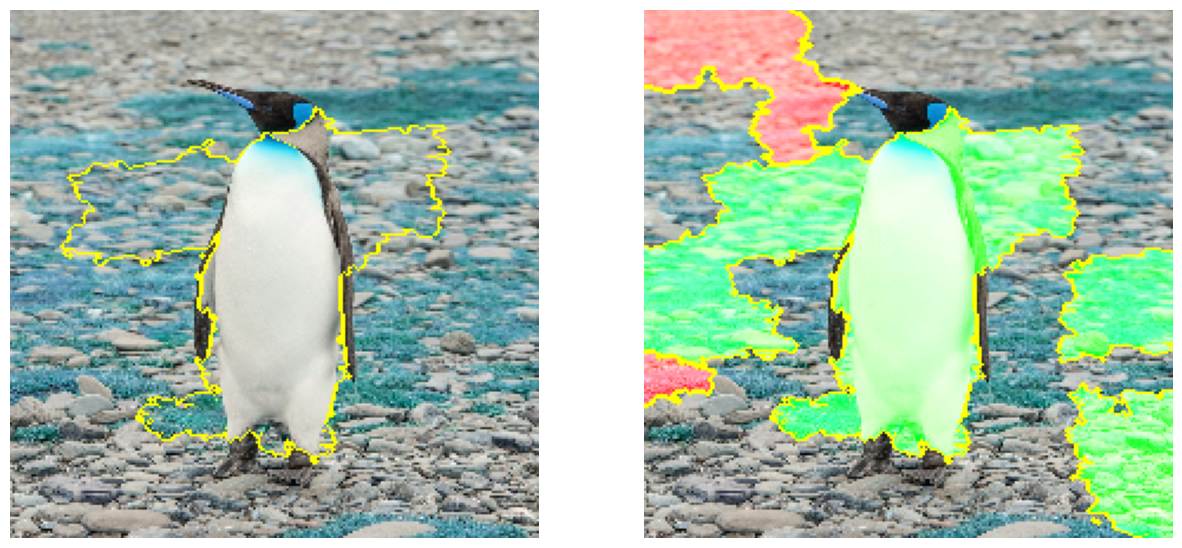

In [15]:
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')
ax2.axis('off')

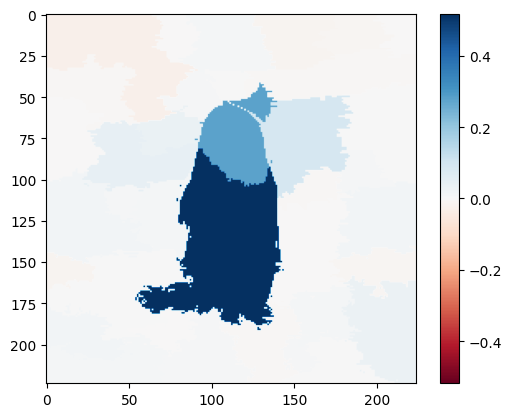

In [16]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

# Second Image

In [33]:
image=cv2.imread("cat_dpg.jpg")
final_image=cv2.resize(image,(224,224))
final_image=np.expand_dims(final_image,axis=0)
final_image=final_image/255.0
predictaions=model.predict(final_image)
result=imagenet_utils.decode_predictions(predictaions)
for x in result[0]:
    print(x)

1/1 [==============================] - 0s 68ms/step
('n02123045', 'tabby', 0.05190673)
('n02123159', 'tiger_cat', 0.036255352)
('n02112137', 'chow', 0.032276053)
('n02093428', 'American_Staffordshire_terrier', 0.03213379)
('n02124075', 'Egyptian_cat', 0.03149184)


In [34]:
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(final_image[0].astype('double'), model.predict,  
                                         top_labels=3, hide_color=0, num_samples=2000)

  0%|          | 0/2000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 326ms/step


(-0.5, 223.5, 223.5, -0.5)

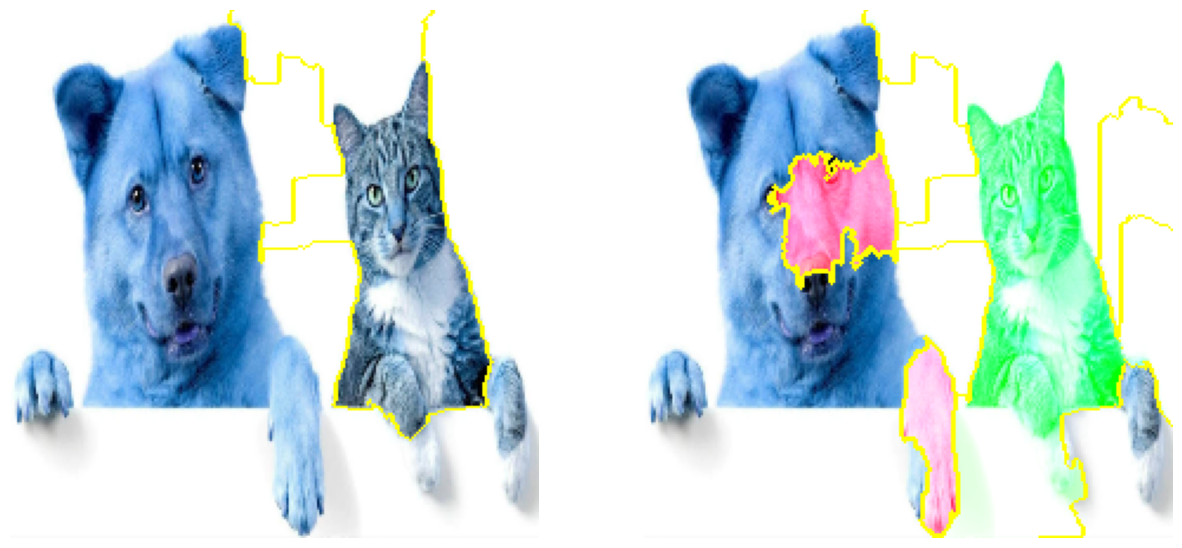

In [35]:
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')
ax2.axis('off')

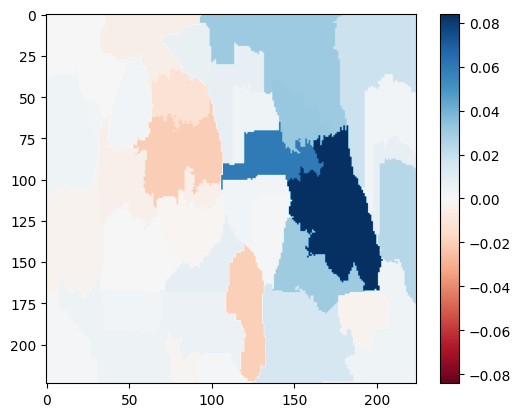

In [36]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

# Third Image

In [24]:
image=cv2.imread("colobusmonkey.jpg")
final_image=cv2.resize(image,(224,224))
final_image=np.expand_dims(final_image,axis=0)
final_image=final_image/255.0
predictaions=model.predict(final_image)
result=imagenet_utils.decode_predictions(predictaions)
for x in result[0]:
    print(x)

1/1 [==============================] - 0s 218ms/step
('n02488702', 'colobus', 0.8087967)
('n02484975', 'guenon', 0.04300543)
('n02483362', 'gibbon', 0.011951433)
('n02488291', 'langur', 0.0063018017)
('n02493509', 'titi', 0.005029436)


In [28]:
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(final_image[0].astype('double'), model.predict,  
                                         top_labels=3, hide_color=0, num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 317ms/step


(-0.5, 223.5, 223.5, -0.5)

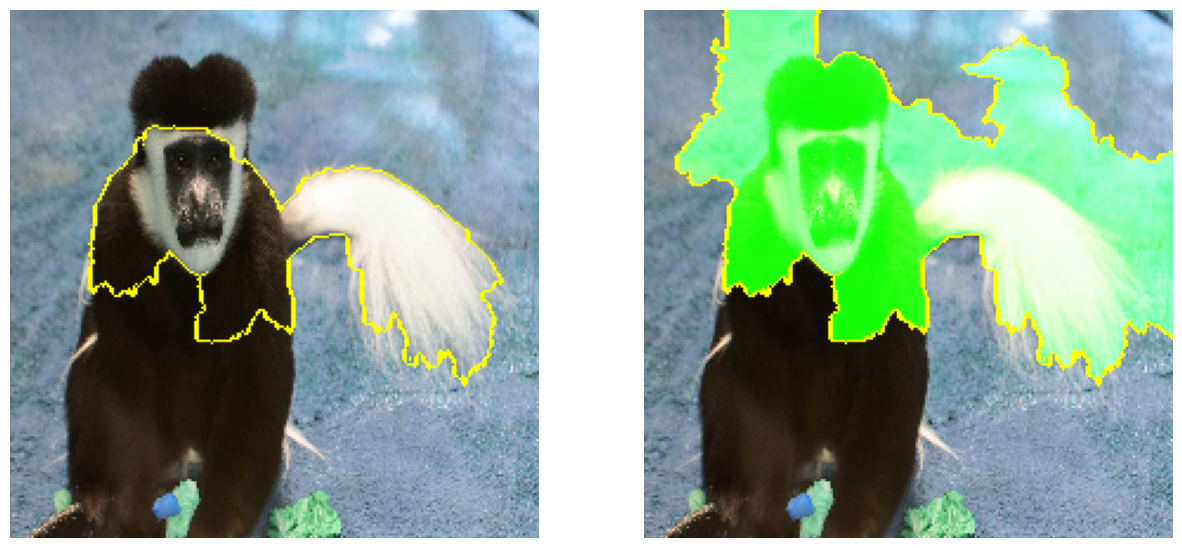

In [31]:
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')
ax2.axis('off')

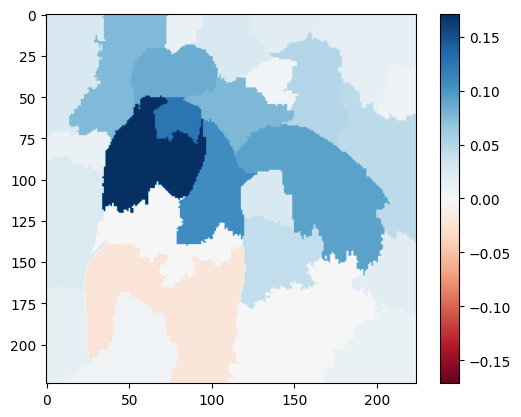

In [32]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()